In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
import category_encoders as ce
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
signdata = pd.read_csv('/Users/emilkoch/Library/Mobile Documents/com~apple~CloudDocs/Data Files/signdata.csv', encoding='latin-1')

In [4]:
# Separate target variable from features
X = signdata.drop(columns=['SignBankEnglishTranslations'])  # Features

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['List', 'Item', 'EnglishWF(lg10)', 'SignFrequency(M)', 'SignFrequency(SD)', 'SignFrequency(Z)', 'SignFrequency(N)', 'Unknown', 'SignFrequency(M-Native)', 'SignFrequency(SD-Native)', 'SignFreq(Z-native)', 'SignFrequency(N-Native)', 'Unknown(Native)', 'SignFrequency(M-Nonnative)', 'SignFrequency(SD-Nonnative)', 'SignFrequency(N-Nonnative)', 'SignFreq(Z-Nonnative)', 'Unknown(Nonnative)', 'DominantTranslationAgreement', 'DominantTranslationAgreement(Native)', 'DominantTranslationAgreement(Nonnative)', 'Iconicity(M)', 'Iconicity(SD)', 'Iconicity(Z)', 'Iconicity(N)', 'D.Iconicity(M)', 'D.Iconicity(SD)', 'D.Iconicity(N)', 'D.Iconicity(Z)', 'D.Iconicity(M-native)', 'D.Iconicity(SD-native)', 'D.Iconicity(Z-native)', 'D.Iconicity(N-native)', 'GuessConsistency', 'GuessAccuracy', 'Transparency(M)', 'Transparency SD', 'Transparency Z', 'Initialized.2.0', 'FingerspelledLoanSign.2.0', 'Compound.2.0', 'NumberOfMorphemes.2.0', 'SignOnset(ms)', 'SignOffset(ms)', 'SignDuration(ms)', '

In [5]:
# Preprocessing for numerical features
numerical_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Copy numerical columns
X_numerical = X[numerical_cols].copy()
print(len(X_numerical))
print(len(numerical_cols))
print(X_numerical.head())
print(X_numerical.isnull().sum())

2723
129
   List  Item  EnglishWF(lg10)  SignFrequency(M)  SignFrequency(SD)  \
0     1     2            3.521             5.143              2.081   
1     1     3            4.645             6.032              1.516   
2     1     4            2.600             4.429              1.720   
3     1     5            2.928             2.621              1.720   
4     1     8            3.041             1.579              0.838   

   SignFrequency(Z)  SignFrequency(N)  Unknown  SignFrequency(M-Native)  \
0             0.621                21    0.000                    5.167   
1             1.068                31    0.000                    6.111   
2             0.232                21    0.000                    4.167   
3            -0.753                29    0.065                    2.000   
4            -1.198                19    0.095                    1.455   

   SignFrequency(SD-Native)  ...  ThumbContact.2.0Frequency  \
0                     2.167  ...                  

In [6]:
columns_to_drop = [
    'UlnarRotationM4.2.0', 'FlexionChangeM5.2.0', 'SpreadChangeM5.2.0',
    'SignTypeM5.2.0', 'MovementM5.2.0', 'RepeatedMovementM5.2.0',
    'MajorLocationM5.2.0', 'MinorLocationM5.2.0', 'SecondMinorLocationM5.2.0',
    'ContactM5.2.0', 'NonDominantHandshapeM5.2.0', 'UlnarRotationM5.2.0',
    'FlexionChangeM6.2.0', 'SpreadChangeM6.2.0', 'SignTypeM6.2.0',
    'MovementM6.2.0', 'RepeatedMovementM6.2.0', 'MajorLocationM6.2.0',
    'MinorLocationM6.2.0', 'SecondMinorLocationM6.2.0', 'ContactM6.2.0',
    'NonDominantHandshapeM6.2.0', 'UlnarRotationM6.2.0'
]
# Select columns not in columns_to_drop from X_numerical
X_numerical_2 = X_numerical.drop(columns=columns_to_drop)
# Impute missing values and scaling
imputer = SimpleImputer(strategy='median')
X_numerical_imputed = imputer.fit_transform(X_numerical_2) 
scaler = StandardScaler()
X_numerical_scaled  = scaler.fit_transform(X_numerical_imputed)  

In [7]:
from sklearn.compose import make_column_selector as selector

# Check for missing values in the DataFrame
missing_values = X[categorical_cols].isnull().sum()
print("Missing values in categorical columns:")
print(missing_values)

# If there are missing values, handle them before preprocessing
if missing_values.sum() > 0:
    # Handle missing values using SimpleImputer with the most frequent strategy
    imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = imputer.fit_transform(X[categorical_cols])

# Define the pipeline for categorical features
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))   # One-hot encode categorical features and produce a dense array
])

# Apply the pipeline to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_pipeline, categorical_cols)
    ],
    remainder='passthrough'  # Include non-categorical columns
)

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X)

# Convert the encoded array to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded)
print(X_encoded_df.isna().sum())

Missing values in categorical columns:
EntryID                     0
LemmaID                     0
Code                        0
Batch                       0
DominantTranslation      2083
                         ... 
SignBankAnnotationID      720
SignBankLemmaID           734
SignBankSemanticField    1846
InCDI                       0
CDISemanticCategory      2155
Length: 61, dtype: int64
0           0
1           0
2           0
3           0
4           0
         ... 
14078       0
14079      26
14080     734
14081    2190
14082    2190
Length: 14083, dtype: int64


In [8]:
# Check data types of all columns in X_encoded_df
data_types = X_encoded_df.dtypes

# Check if any column has a non-numeric data type
non_numeric_columns = data_types[data_types != 'float64'][data_types != 'int64']

# Print any non-numeric columns
if not non_numeric_columns.empty:
    print("Non-numeric columns found after one-hot encoding:")
    print(non_numeric_columns)
else:
    print("All columns are numeric after one-hot encoding.")


All columns are numeric after one-hot encoding.


In [9]:
# Concatenate numerical and encoded categorical columns
X_processed = pd.concat([pd.DataFrame(X_numerical_scaled), X_encoded_df], axis=1)

# Check for missing values in the processed DataFrame
missing_values_processed = X_processed.isnull().sum()
print("Missing values in processed DataFrame:")
print(missing_values_processed)

# Replace NaN values with 0
X_processed.fillna(0, inplace=True)
print(X_processed.isnull().sum())

Missing values in processed DataFrame:
0           0
1           0
2           0
3           0
4           0
         ... 
14078       0
14079      26
14080     734
14081    2190
14082    2190
Length: 14189, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
14078    0
14079    0
14080    0
14081    0
14082    0
Length: 14189, dtype: int64


In [10]:
# Drop NaN values from the target variable
y_cleaned = signdata['SignBankEnglishTranslations'].dropna()

# Index X_processed with the same indices as y_cleaned
X_processed_cleaned = X_processed.loc[y_cleaned.index]

print("Shape of X_processed:", X_processed_cleaned.shape)
print("Shape of y_encoded:", y_cleaned.shape)  # Adjusted to use y_cleaned.shape for consistency

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y_cleaned)

# Check for NaN values in the target variable after dropping
nan_count_after_drop = y_cleaned.isnull().sum()
print("Number of NaN values in 'SignBankEnglishTranslations' column after dropping:", nan_count_after_drop)
# Check for NaN values in X_processed_cleaned after dropping NaN values from the target variable
nan_count_in_processed = X_processed_cleaned.isna().sum()
print('Number of NaN values in X_processed_cleaned:', nan_count_in_processed)

Shape of X_processed: (1984, 14189)
Shape of y_encoded: (1984,)
Number of NaN values in 'SignBankEnglishTranslations' column after dropping: 0


Number of NaN values in X_processed_cleaned: 0        0
1        0
2        0
3        0
4        0
        ..
14078    0
14079    0
14080    0
14081    0
14082    0
Length: 14189, dtype: int64


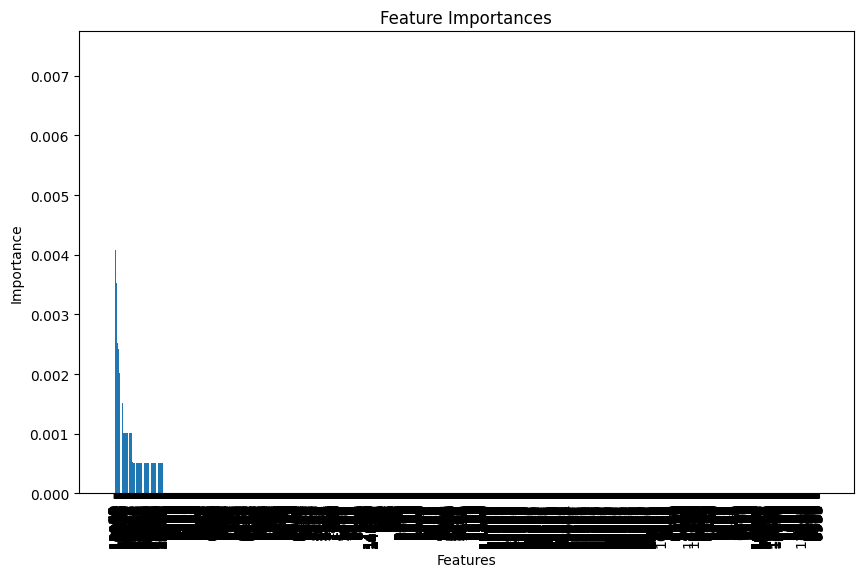

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
tree_clf = DecisionTreeClassifier()

# Fit the decision tree model to the data
tree_clf.fit(X_processed_cleaned, y_encoded)

# Extract feature importances
feature_importances = tree_clf.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_processed_cleaned .shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_processed_cleaned .shape[1]), X_processed_cleaned.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Top 10 most important features:
   Feature  Importance
2    14015    0.212242
0    13952    0.190279
1    14011    0.163951
3    14017    0.117344
9    14033    0.105260
7    14030    0.081175
6    14026    0.073179
5    14024    0.035095
4    14020    0.021475
8    14031    0.000000


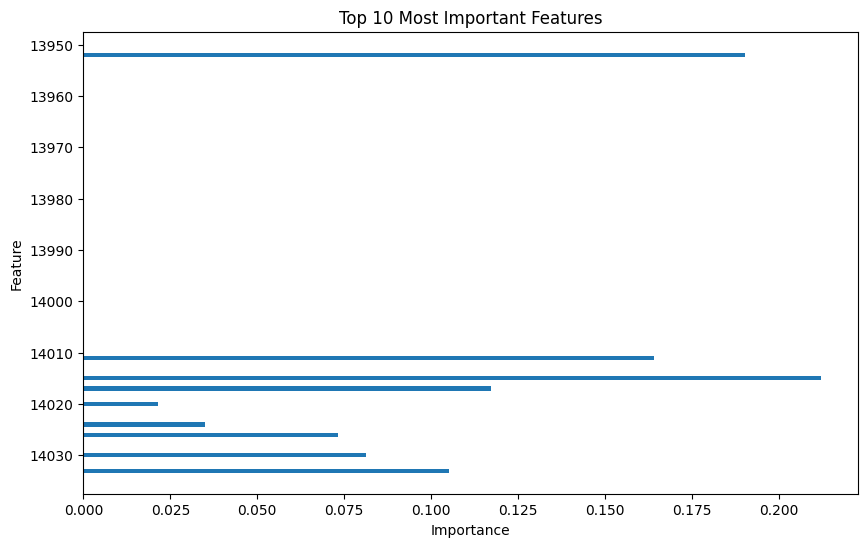

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances along with feature names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
n = 10  # Number of top features to display
print("Top", n, "most important features:")
print(feature_importance_df.head(n))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:n], feature_importance_df['Importance'][:n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features'.format(n))
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold

# Calculate the variance of each feature
feature_variances = X_processed_cleaned.var()

# Select features with a variance above the threshold (0.03)
selected_features_indices = np.where(feature_variances > 0.03)[0]

# Get the names of the selected features
selected_feature_names = X_processed_cleaned.columns[selected_features_indices]

# Print selected features
print("Selected Features (Variance > 0.03):")
for i, feature_name in enumerate(selected_feature_names):
    print(f"Feature {i + 1}: {feature_name}")

# Split the data into training and testing sets using the selected features
X_train, X_test = X_processed_cleaned.iloc[:, selected_features_indices], X_processed_cleaned.iloc[:, selected_features_indices]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_encoded, test_size=0.2, random_state=42)

# Initialize and train your Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

# Evaluate the model
accuracy = gradient_boosting_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Selected Features (Variance > 0.03):
Feature 1: 0
Feature 2: 1
Feature 3: 2
Feature 4: 3
Feature 5: 4
Feature 6: 5
Feature 7: 6
Feature 8: 7
Feature 9: 8
Feature 10: 9
Feature 11: 10
Feature 12: 11
Feature 13: 12
Feature 14: 13
Feature 15: 14
Feature 16: 15
Feature 17: 16
Feature 18: 17
Feature 19: 18
Feature 20: 19
Feature 21: 20
Feature 22: 21
Feature 23: 22
Feature 24: 23
Feature 25: 24
Feature 26: 25
Feature 27: 26
Feature 28: 27
Feature 29: 28
Feature 30: 29
Feature 31: 30
Feature 32: 31
Feature 33: 32
Feature 34: 33
Feature 35: 34
Feature 36: 35
Feature 37: 36
Feature 38: 37
Feature 39: 38
Feature 40: 39
Feature 41: 40
Feature 42: 41
Feature 43: 42
Feature 44: 43
Feature 45: 44
Feature 46: 45
Feature 47: 46
Feature 48: 47
Feature 49: 48
Feature 50: 49
Feature 51: 50
Feature 52: 51
Feature 53: 52
Feature 54: 53
Feature 55: 54
Feature 56: 55
Feature 57: 56
Feature 58: 57
Feature 59: 58
Feature 60: 60
Feature 61: 61
Feature 62: 62
Feature 63: 63
Feature 64: 64
Feature 65: 66
Feature